# K-Nearest Neighbors (KNN)

## What is K-Nearest Neighbors?

**K-Nearest Neighbors (KNN)** is a simple, intuitive, and non-parametric supervised learning algorithm used for both classification and regression. It was developed by Evelyn Fix and Joseph Hodges in 1951 and is one of the simplest machine learning algorithms based on the principle that similar data points exist in close proximity.

## Key Concepts:

1. **Instance-Based Learning**: KNN is a lazy learner - it doesn't build a model during training, instead stores all training data

2. **Non-Parametric**: Makes no assumptions about the underlying data distribution

3. **Distance-Based**: Uses distance metrics to find the K nearest neighbors

4. **K Value**: The number of nearest neighbors to consider for making predictions

5. **Voting/Averaging**: Classification uses majority voting, regression uses average of K neighbors

## How KNN Works:

### For Classification:
1. **Choose K**: Select the number of neighbors to consider
2. **Calculate Distance**: Compute distance between query point and all training points
3. **Find Neighbors**: Identify K nearest neighbors based on distance
4. **Majority Vote**: Assign the most common class among K neighbors
5. **Output**: Return the predicted class

### For Regression:
- Same steps 1-3 as classification
- **Average**: Calculate mean (or weighted mean) of K neighbors' values
- **Output**: Return the averaged prediction

## Distance Metrics:

**Euclidean Distance** (most common):
$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

**Manhattan Distance**:
$$d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$$

**Minkowski Distance** (generalized):
$$d(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$$

Where:
- p=1: Manhattan distance
- p=2: Euclidean distance

## Choosing the Right K:

- **Small K (e.g., K=1)**: 
  - More sensitive to noise
  - Complex decision boundaries
  - Risk of overfitting

- **Large K**:
  - Smoother decision boundaries
  - More resistant to noise
  - Risk of underfitting
  - Computationally expensive

- **Optimal K**: Usually odd numbers to avoid ties, often found through cross-validation

## Advantages:
- Simple and intuitive to understand
- No training phase (lazy learning)
- Naturally handles multi-class problems
- Can be used for both classification and regression
- No assumptions about data distribution
- Can adapt to new training data easily
- Effective for non-linear data

## Disadvantages:
- Computationally expensive for large datasets (slow prediction)
- Requires feature scaling/normalization
- Sensitive to irrelevant features (curse of dimensionality)
- Needs to store all training data
- Sensitive to imbalanced datasets
- Choosing optimal K can be challenging
- Poor performance with high-dimensional data

## Applications:
- Recommender systems
- Image recognition and classification
- Medical diagnosis
- Credit rating
- Pattern recognition
- Anomaly detection

## Step 1: Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import make_classification, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load and Prepare Dataset

We'll use the Iris dataset for classification demonstration.

In [4]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Display dataset information
print("Dataset Information:")
print("="*60)
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")
print(f"Class distribution: {np.bincount(y)}")
print("="*60)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Dataset Information:
Number of samples: 150
Number of features: 4
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]

Training set size: (105, 4)
Testing set size: (45, 4)


## Step 3: Feature Scaling

KNN is distance-based, so scaling features is crucial for fair distance calculations.

In [5]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Statistics:")
print("="*60)
print("Before scaling:")
print(f"  Train mean: {X_train.mean(axis=0)}")
print(f"  Train std:  {X_train.std(axis=0)}")
print("\nAfter scaling:")
print(f"  Train mean: {X_train_scaled.mean(axis=0)}")
print(f"  Train std:  {X_train_scaled.std(axis=0)}")
print("="*60)

Feature Scaling Statistics:
Before scaling:
  Train mean: [5.84285714 3.00952381 3.87047619 1.23904762]
  Train std:  [0.82932642 0.41691013 1.71313824 0.73917525]

After scaling:
  Train mean: [ 2.57148800e-15 -9.89254974e-16 -2.91830052e-16  1.20538500e-16]
  Train std:  [1. 1. 1. 1.]


## Step 4: Train KNN Classifier

Let's start with K=5 neighbors.

In [6]:
# Create KNN classifier with K=5
knn = KNeighborsClassifier(
    n_neighbors=5,          # Number of neighbors
    weights='uniform',      # All neighbors have equal weight
    metric='euclidean',     # Distance metric
    algorithm='auto'        # Algorithm to compute nearest neighbors
)

# Train the model
knn.fit(X_train_scaled, y_train)

print("KNN Classifier trained successfully!")
print(f"Number of neighbors (K): {knn.n_neighbors}")
print(f"Distance metric: {knn.metric}")
print(f"Weighting scheme: {knn.weights}")

KNN Classifier trained successfully!
Number of neighbors (K): 5
Distance metric: euclidean
Weighting scheme: uniform


## Step 5: Make Predictions and Evaluate

In [7]:
# Make predictions
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model Performance:")
print("="*60)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")
print("="*60)

print("\nClassification Report (Test Set):")
print("="*60)
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

Model Performance:
Training Accuracy: 0.9524
Testing Accuracy:  1.0000

Classification Report (Test Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Step 6: Confusion Matrix Visualization

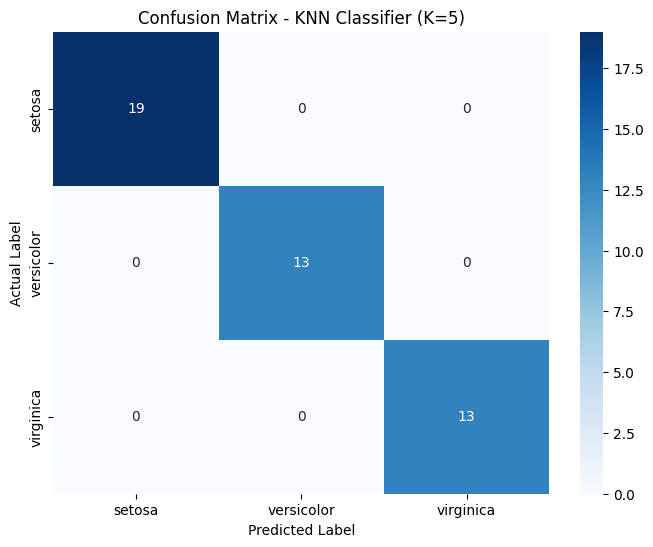


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [8]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix - KNN Classifier (K=5)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print(f"\nConfusion Matrix:")
print(cm)

## Step 7: Finding Optimal K Value

Let's test different K values to find the optimal one.

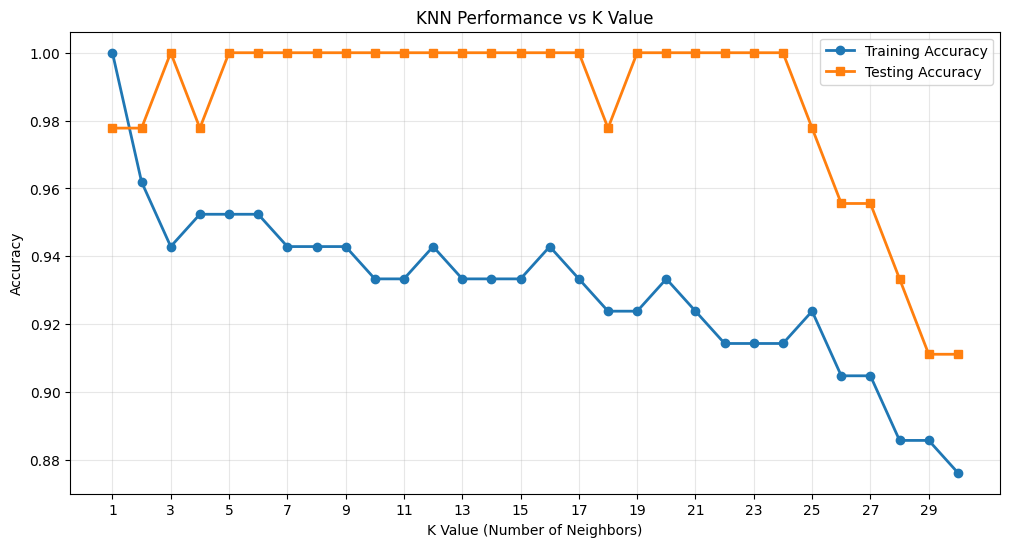

Optimal K value: 3
Best test accuracy: 1.0000


In [9]:
# Test different K values
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    
    train_scores.append(knn_temp.score(X_train_scaled, y_train))
    test_scores.append(knn_temp.score(X_test_scaled, y_test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(k_range, test_scores, marker='s', label='Testing Accuracy', linewidth=2)
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.show()

# Find optimal K
optimal_k = k_range[np.argmax(test_scores)]
print(f"Optimal K value: {optimal_k}")
print(f"Best test accuracy: {max(test_scores):.4f}")

## Key Parameters and Best Practices

### Key Parameters in KNN:

- **n_neighbors (K)**: Number of neighbors to use
  - Small K: More complex boundaries, sensitive to noise
  - Large K: Smoother boundaries, more robust but slower

- **weights**: Weight function for neighbors
  - `'uniform'`: All neighbors have equal weight
  - `'distance'`: Closer neighbors have more influence

- **metric**: Distance metric to use
  - `'euclidean'`: Most common (L2 norm)
  - `'manhattan'`: L1 norm
  - `'minkowski'`: Generalized distance

### Best Practices:

1. **Always Scale Features** - Critical for distance calculations
2. **Choose K Wisely** - Use cross-validation
3. **Handle High Dimensions** - Use dimensionality reduction
4. **Optimize for Large Datasets** - Use ball_tree or kd_tree

## Conclusion:

K-Nearest Neighbors is a powerful algorithm that:
- Makes predictions based on similarity to nearby points
- Requires no training phase (lazy learning)
- Works for both classification and regression
- Is intuitive and easy to understand
- Needs careful feature scaling and K selection

**Key Insight**: KNN embodies the principle "you are the average of your K closest friends" - a data point's prediction is determined by its nearest neighbors!